In [152]:
import matplotlib 
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

In [263]:
VEHICLE_X = 20
VEHICLE_Y = 50
VEHICLE_WIDTH = 20 #Fixed
VEHICLE_LENGTH = 30 #Fixed

# OBSTACLE_LEFT_LENGTH = 
# OBSTACLE_LEFT_WIDTH = 20
# OBSTACLE_RIGHT_LENGTH = 
# OBSTACLE_RIGHT_WIDTH = 20

OBSTACLE_X = 0
OBSTACLE_Y = 150
OBSTACLE_WIDTH = 20
OBSTACLE_LENGTH = 50

OBSTACLE_MOVING_X = 40
OBSTACLE_MOVING_Y = 250
OBSTACLE_MOVING_WIDTH = 30
OBSTACLE_MOVING_LENGTH = 50

VEHICLE_SPEED_X = 0
VEHICLE_SPEED_Y = 10

In [66]:
def road_item(name, item_x, item_y, item_width, item_length, item_color):
    plot_obj = matplotlib.patches.Rectangle((item_x, item_y), item_width, item_length, color = item_color)
    item_coords = \
    {name : {
            "blx": item_x,
            "bly": item_y,
            "brx": item_x + item_width,
            "bry": item_y,
            "tlx": item_x,
            "tly": item_y + item_length,
            "trx": item_x + item_width,
            "try": item_y + item_length
            }}
    return plot_obj, item_coords


In [ ]:
# list_obstacle_right = []
# list_obstacle_left = []
# list_obstacle_bottom = [150, 200]
# list_obstacle_top = []

In [264]:
vehicle, vehicle_coords = road_item("vehicle", VEHICLE_X, VEHICLE_Y, VEHICLE_WIDTH, VEHICLE_LENGTH, 'green')
obstacle_left1, obstacle_left1_coords = road_item("obstacle_left1", 0, 150, 50, OBSTACLE_WIDTH, 'black')
obstacle_right1, obstacle_right1_coords = road_item("obstacle_right1", (100-20), 200, 20, OBSTACLE_WIDTH, 'black')
obstacle_moving1, obstacle_moving1_coords = road_item("obstacle_moving1", OBSTACLE_MOVING_X, OBSTACLE_MOVING_Y, OBSTACLE_MOVING_WIDTH, OBSTACLE_MOVING_LENGTH, 'red')


In [265]:
obstacle_coords_list = {**obstacle_right1_coords, **obstacle_left1_coords, **obstacle_moving1_coords}
obstacle_coords_list

{'obstacle_right1': {'blx': 80,
  'bly': 200,
  'brx': 100,
  'bry': 200,
  'tlx': 80,
  'tly': 220,
  'trx': 100,
  'try': 220},
 'obstacle_left1': {'blx': 0,
  'bly': 150,
  'brx': 50,
  'bry': 150,
  'tlx': 0,
  'tly': 170,
  'trx': 50,
  'try': 170},
 'obstacle_moving1': {'blx': 40,
  'bly': 250,
  'brx': 70,
  'bry': 250,
  'tlx': 40,
  'tly': 300,
  'trx': 70,
  'try': 300}}

In [266]:
first_obstacle = list(obstacle_coords_list.keys())[0]
v_bly = obstacle_coords_list[first_obstacle]["bly"]

for k, v in obstacle_coords_list.items():
    if v_bly >= v["bly"]:
        first_obstacle = k
        v_bly = v["bly"]

first_obstacle, v_bly

('obstacle_left1', 150)

In [267]:
dist_tosteer_right = obstacle_coords_list[first_obstacle]["brx"] - vehicle_coords["vehicle"]["tlx"]
dist_tosteer_left = vehicle_coords["vehicle"]["trx"] - obstacle_coords_list[first_obstacle]["blx"]

dist_tosteer_right < dist_tosteer_left

True

In [268]:
VEHICLE_SPEED_X = dist_tosteer_right / ((obstacle_coords_list[first_obstacle]["bry"] - vehicle_coords["vehicle"]["tly"]) / VEHICLE_SPEED_Y)
VEHICLE_SPEED_X = np.ceil(VEHICLE_SPEED_X)
VEHICLE_SPEED_X

5.0

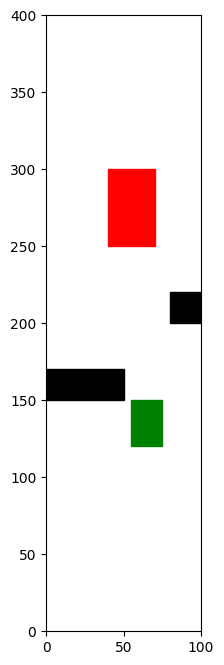

In [269]:

# while VEHICLE_Y + VEHICLE_LENGTH < OBSTACLE_Y:
while obstacle_coords_list[first_obstacle]["bry"] > vehicle_coords["vehicle"]["tly"]:

    fig = plt.figure(figsize = (2, 8))
    ax = fig.add_subplot(111)

    VEHICLE_X = VEHICLE_X + VEHICLE_SPEED_X
    VEHICLE_Y = VEHICLE_Y + VEHICLE_SPEED_Y

    vehicle, vehicle_coords = road_item("vehicle", VEHICLE_X, VEHICLE_Y, VEHICLE_WIDTH, VEHICLE_LENGTH, 'green')
    obstacle_left1, obstacle_left1_coords = road_item("obstacle_left1", 0, 150, 50, OBSTACLE_WIDTH, 'black')
    obstacle_right1, obstacle_right1_coords = road_item("obstacle_right1", (100-20), 200, 20, OBSTACLE_WIDTH, 'black')
    obstacle_moving1, obstacle_moving1_coords = road_item("obstacle_moving1", OBSTACLE_MOVING_X, OBSTACLE_MOVING_Y, OBSTACLE_MOVING_WIDTH, OBSTACLE_MOVING_LENGTH, 'red')

    ax.add_patch(vehicle) 
    ax.add_patch(obstacle_left1) 
    ax.add_patch(obstacle_right1)
    ax.add_patch(obstacle_moving1)

    plt.xlim([0, 100]) 
    plt.ylim([0, 400])

    plt.show()
    plt.pause(0.1)
    clear_output(wait=True)



IndexError: list index out of range

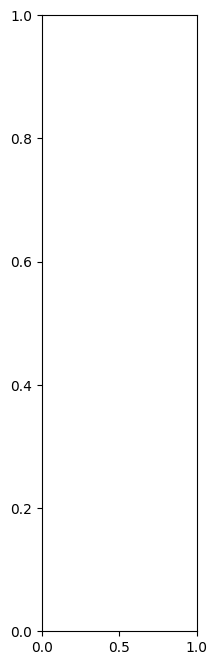

In [270]:
# Letting the vehicle pass
VEHICLE_SPEED_X = 0
obstacle_passed = False

while obstacle_coords_list[first_obstacle]["try"] > vehicle_coords["vehicle"]["bly"]:

    fig = plt.figure(figsize = (2, 8))
    ax = fig.add_subplot(111)

    VEHICLE_X = VEHICLE_X + VEHICLE_SPEED_X
    VEHICLE_Y = VEHICLE_Y + VEHICLE_SPEED_Y

    vehicle, vehicle_coords = road_item("vehicle", VEHICLE_X, VEHICLE_Y, VEHICLE_WIDTH, VEHICLE_LENGTH, 'green')
    obstacle_left1, obstacle_left1_coords = road_item("obstacle_left1", 0, 150, 50, OBSTACLE_WIDTH, 'black')
    obstacle_right1, obstacle_right1_coords = road_item("obstacle_right1", (100-20), 200, 20, OBSTACLE_WIDTH, 'black')
    obstacle_moving1, obstacle_moving1_coords = road_item("obstacle_moving1", OBSTACLE_MOVING_X, OBSTACLE_MOVING_Y, OBSTACLE_MOVING_WIDTH, OBSTACLE_MOVING_LENGTH, 'red')


    if (vehicle_coords["vehicle"]["tly"] > obstacle_coords_list[first_obstacle]["bry"]):
        
        del obstacle_coords_list[first_obstacle]

        first_obstacle = list(obstacle_coords_list.keys())[0]
        v_bly = obstacle_coords_list[first_obstacle]["bly"]

        for k, v in obstacle_coords_list.items():
            if v_bly >= v["bly"]:
                first_obstacle = k
                v_bly = v["bly"]
        
        obstacle_passed = True
        
    ax.add_patch(vehicle) 
    ax.add_patch(obstacle_left1) 
    ax.add_patch(obstacle_right1)
    ax.add_patch(obstacle_moving1)

    plt.xlim([0, 100]) 
    plt.ylim([0, 400])

    plt.show()
    plt.pause(0.1)
    clear_output(wait=True)


In [271]:
obstacle_coords_list

{}

In [236]:
del obstacle_coords_list[first_obstacle]
obstacle_coords_list

{'obstacle_right1': {'blx': 80,
  'bly': 200,
  'brx': 100,
  'bry': 200,
  'tlx': 80,
  'tly': 220,
  'trx': 100,
  'try': 220}}

In [237]:
first_obstacle = list(obstacle_coords_list.keys())[0]
v_bly = obstacle_coords_list[first_obstacle]["bly"]

for k, v in obstacle_coords_list.items():
    if v_bly >= v["bly"]:
        first_obstacle = k
        v_bly = v["bly"]

first_obstacle, v_bly

('obstacle_right1', 200)

In [238]:
obstacle_coords_list[first_obstacle]

{'blx': 80,
 'bly': 200,
 'brx': 100,
 'bry': 200,
 'tlx': 80,
 'tly': 220,
 'trx': 100,
 'try': 220}

In [239]:
obstacle_coords_list[first_obstacle]["bry"] > vehicle_coords["vehicle"]["tly"]

False

In [240]:
dist_tosteer_right = obstacle_coords_list[first_obstacle]["brx"] - vehicle_coords["vehicle"]["tlx"]
dist_tosteer_left = vehicle_coords["vehicle"]["trx"] - obstacle_coords_list[first_obstacle]["blx"]

dist_tosteer_right < dist_tosteer_left

False

In [241]:
dist_tosteer_left

-5.0

In [244]:
# Vehicle has either already passed the obstacle or is in same horizontal line
if (obstacle_coords_list[first_obstacle]["bry"] - vehicle_coords["vehicle"]["tly"]) <= 0:
    VEHICLE_SPEED_X = 0
else:
    VEHICLE_SPEED_X = dist_tosteer_left / ((obstacle_coords_list[first_obstacle]["bry"] - vehicle_coords["vehicle"]["tly"]) / VEHICLE_SPEED_Y)
    VEHICLE_SPEED_X = np.ceil(VEHICLE_SPEED_X) + 1

VEHICLE_SPEED_X

0